In [25]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import PIL

import pydicom as dicom

import os
import random
import glob



In [26]:
train_lables_df = pd.read_csv("../input/rsna-miccai-brain-tumor-radiogenomic-classification/train_labels.csv")
train_lables_df

,BraTS21ID,MGMT_value
0,0,1
1,2,1
2,3,0
3,5,1
4,6,1
...,...,...
580,1005,1
581,1007,1
582,1008,1
583,1009,0


<AxesSubplot:xlabel='MGMT_value', ylabel='count'>

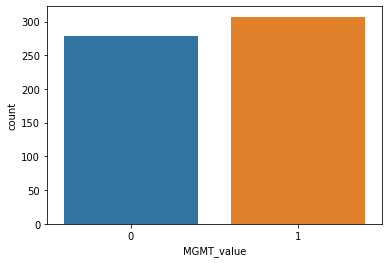

In [27]:
sns.countplot(data=train_lables_df, x="MGMT_value")

Classes are almost balanced. Let's check the data

In [103]:
#let's display all the images in all folders for a paitent

def show_folder_files(folder_name):
    
    images = []
    
    path = train_file_path+"/"+patient_id+"/"+folder_name+"/*.dcm"
    
    for img_path in glob.glob(path):
        images.append(img_path)

    print('Number of files in {} folder is {}'.format(folder_name,len(images)))
    
    print('Displaying first 10 files...')
    
    images = images[:10]

    plt.figure(figsize=(20,10))
    columns = 5

    for i, image in enumerate(images):
        plt.subplot(len(images) / columns + 1, columns, i + 1)
        ds = dicom.dcmread(image)
        plt.imshow(ds.pixel_array)
        plt.title(folder_name)

Showing for folder FLAIR and patient 00000
Number of files in FLAIR folder is 400
Displaying first 10 files...


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:22: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.


Showing for folder T1w and patient 00000
Number of files in T1w folder is 33
Displaying first 10 files...
Showing for folder T1wCE and patient 00000
Number of files in T1wCE folder is 129
Displaying first 10 files...
Showing for folder T2w and patient 00000
Number of files in T2w folder is 408
Displaying first 10 files...


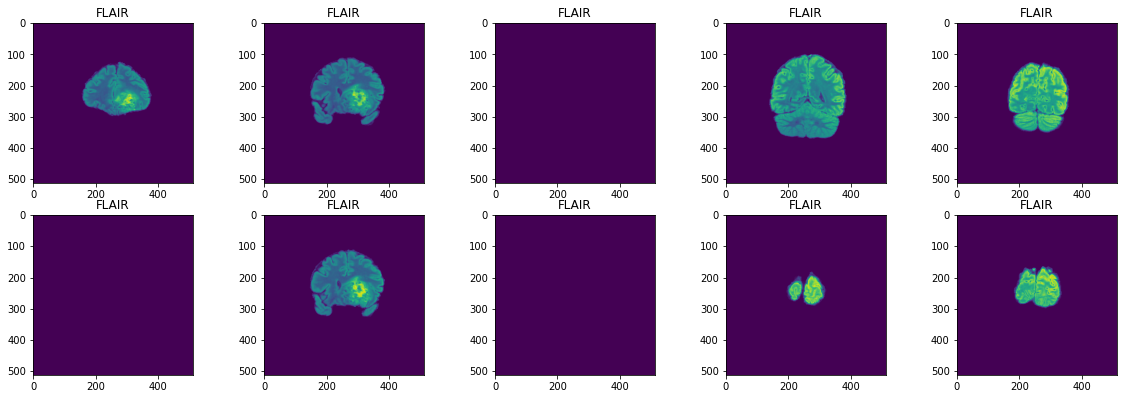

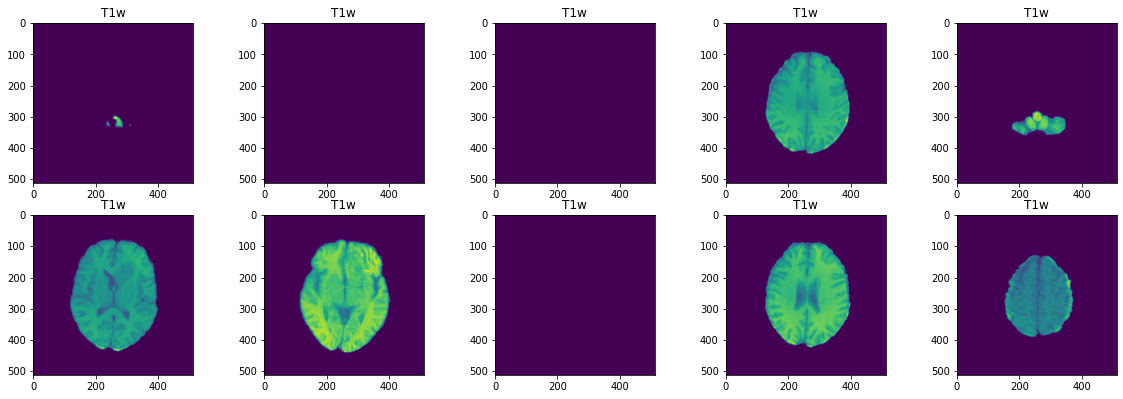

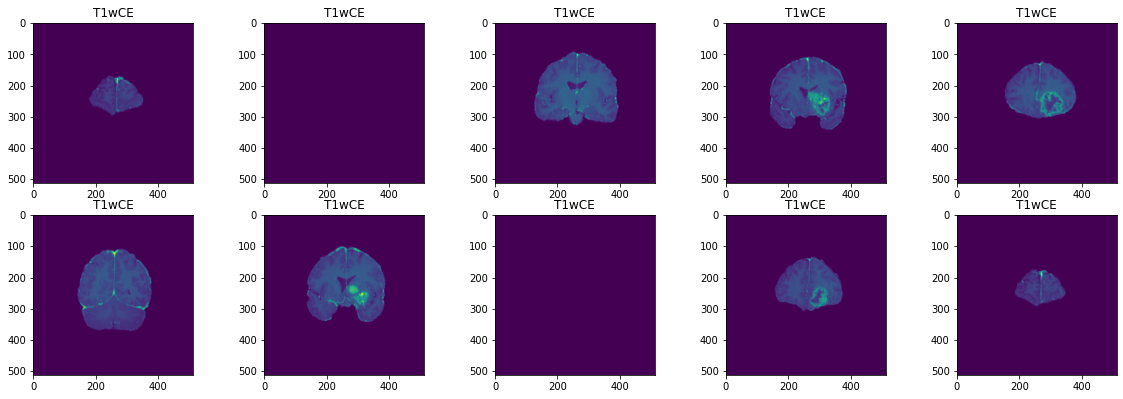

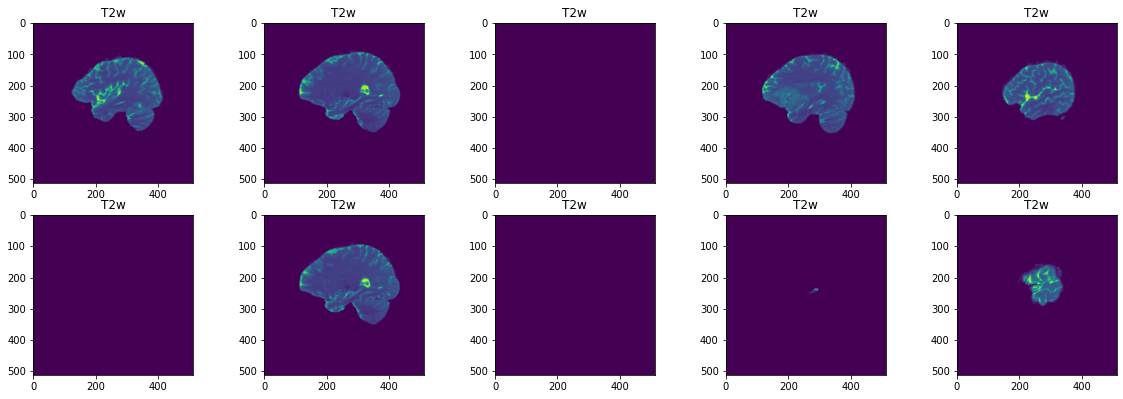

In [104]:
train_file_path = "../input/rsna-miccai-brain-tumor-radiogenomic-classification/train/"

#patinet "00000" has tumor, let's see his scans
patient_id = '00000'

folders = ["FLAIR","T1w","T1wCE","T2w"]

for folder in folders:
    print("Showing for folder {} and patient {}".format(folder,patient_id))
    show_folder_files(folder)

Showing for folder FLAIR and patient 00003
Number of files in FLAIR folder is 129
Displaying first 10 files...


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:22: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.


Showing for folder T1w and patient 00003
Number of files in T1w folder is 33
Displaying first 10 files...
Showing for folder T1wCE and patient 00003
Number of files in T1wCE folder is 129
Displaying first 10 files...
Showing for folder T2w and patient 00003
Number of files in T2w folder is 408
Displaying first 10 files...


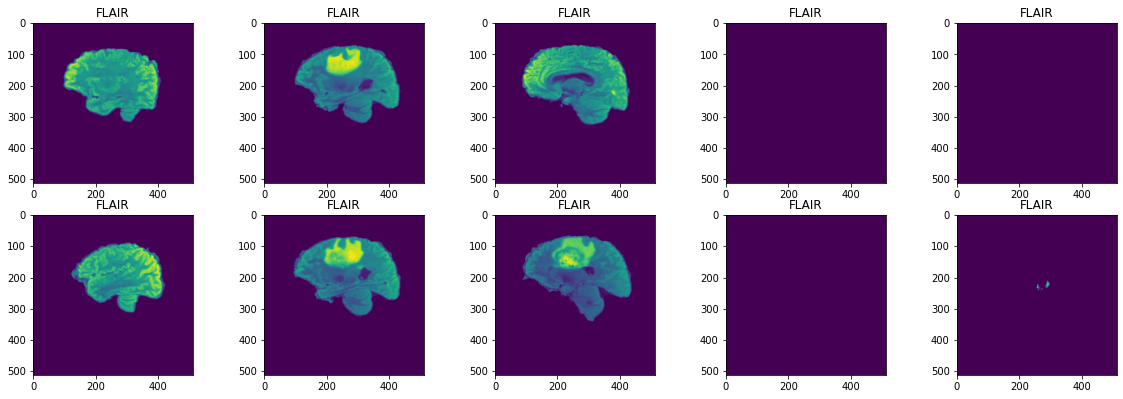

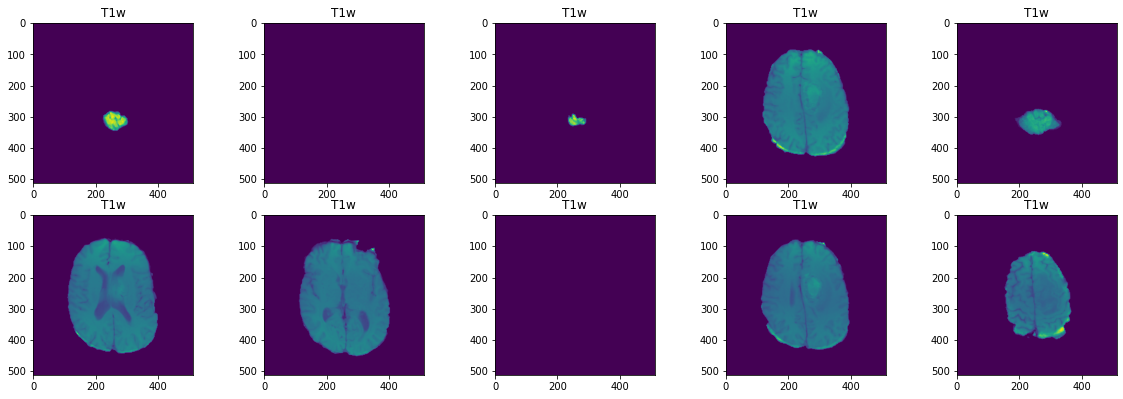

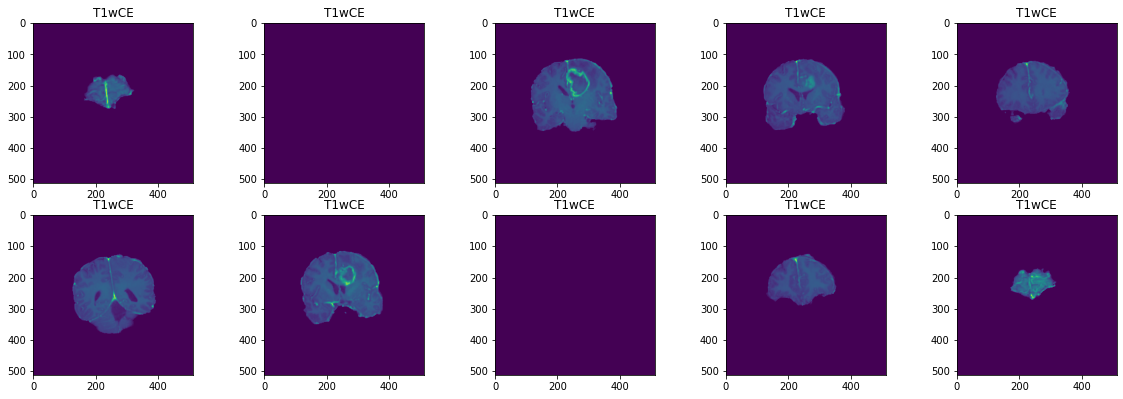

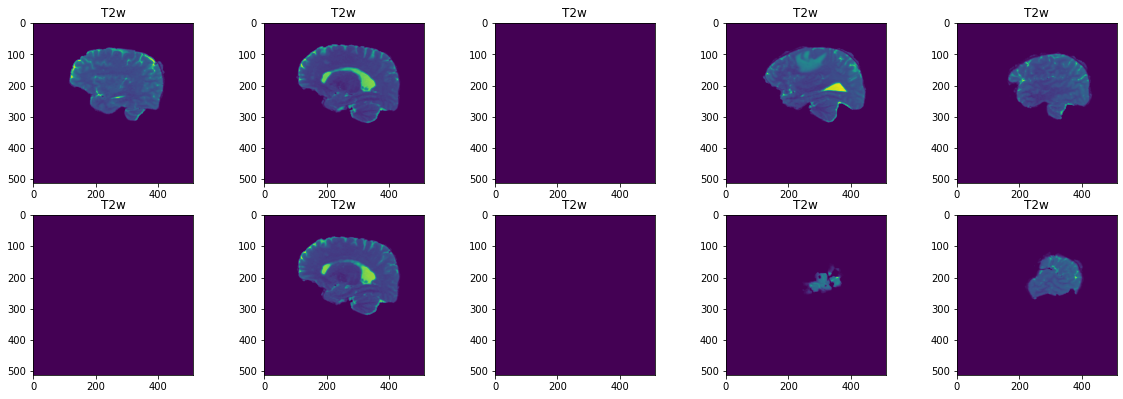

In [105]:
#patinet "00003" has no tumor, let's see his scans
patient_id = '00003'

for folder in folders:
    print("Showing for folder {} and patient {}".format(folder,patient_id))
    show_folder_files(folder)

Did I understand anything form the scans? nope. But its clear there are different number of scans for each patient, I wonder why. It seems logical to have more number of scans for the suspected patient for further confirmation and lesser for a patient whoes earlier scans doesn't show signs. Can this be a feature? or rather should this be a feature?